In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from utils import *

In [3]:
from dataset import *

In [4]:
from data_module import *

In [5]:
plt.rcParams['figure.figsize'] = (14,10)
font = {'family' : 'DejaVu Sans',  'weight' : 'normal',  'size'  : 22}
plt.rc('font', **font)

In [6]:
df = pd.read_csv('dataset_strat.csv')

In [7]:
df

,filename,width,height,class,bboxes,total_bolts,fold
0,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[3530, 2445, 3730, 2644]]",1,0
1,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[351, 319, 546, 519]]",1,0
2,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[287, 1023, 486, 1227], [1404, 2490, 1604, 26...",3,0
3,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[272, 1018, 466, 1212], [1399, 2495, 1599, 26...",3,0
4,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[356, 389, 561, 588]]",1,0
...,...,...,...,...,...,...,...
102,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[326, 254, 526, 459], [2522, 269, 2722, 469],...",9,4
103,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[1484, 529, 1684, 723]]",1,4
104,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[336, 324, 536, 524]]",1,4
105,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[466, 469, 671, 663]]",1,4


In [8]:
df["bboxes"] = df["bboxes"].apply(eval)

In [9]:
test_dataset = BoltDataset(df, get_valid_transforms(), 'test')

21


In [10]:
test_dataset[0]

(tensor([[[1.8722, 1.9235, 1.9235,  ..., 1.8379, 1.7865, 1.7865],
          [1.9064, 1.9064, 1.9235,  ..., 1.7865, 1.8550, 1.8208],
          [1.9235, 1.9578, 1.9407,  ..., 1.7694, 1.8037, 1.7865],
          ...,
          [1.9749, 1.9749, 1.9578,  ..., 1.8379, 1.7865, 1.8037],
          [1.9749, 1.9749, 2.0092,  ..., 1.8550, 1.8550, 1.7865],
          [1.9920, 2.0092, 2.0092,  ..., 1.7865, 1.8208, 1.8208]],
 
         [[2.0434, 2.0259, 2.0434,  ..., 1.8683, 1.8859, 1.8859],
          [2.0084, 2.0084, 2.0434,  ..., 1.8683, 1.8683, 1.9034],
          [2.0084, 2.0434, 2.0434,  ..., 1.9209, 1.8683, 1.8859],
          ...,
          [2.1134, 2.1134, 2.1134,  ..., 1.9559, 1.9734, 1.9384],
          [2.0959, 2.1310, 2.1134,  ..., 1.9559, 1.9384, 1.9209],
          [2.1310, 2.1310, 2.1310,  ..., 1.9384, 1.9209, 1.9209]],
 
         [[2.1171, 2.1520, 2.1520,  ..., 2.0300, 1.9428, 1.9603],
          [2.1520, 2.2043, 2.1694,  ..., 2.0125, 2.0125, 2.0300],
          [2.1694, 2.1868, 2.1694,  ...,

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 512, 512])


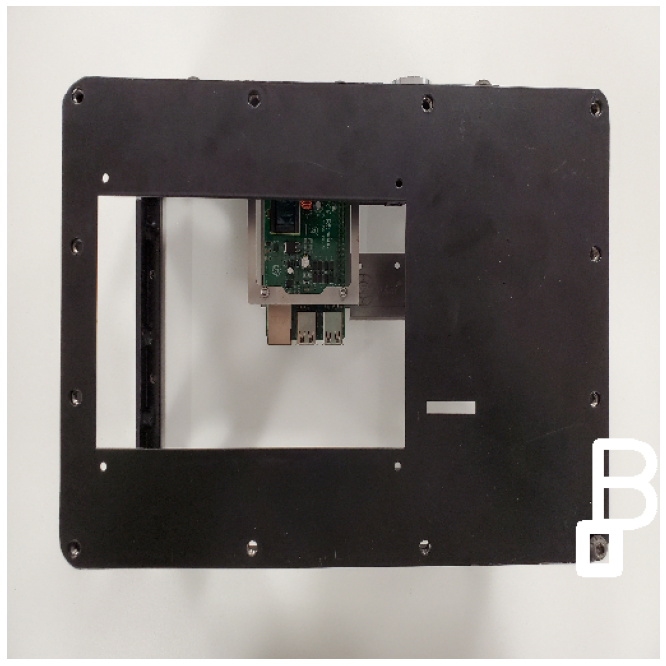

In [11]:
test_dataset.show_data(15)

In [12]:
bolt_module = BoltDataModule(df,
                             get_train_transforms(target_img_size=1024),
                             get_valid_transforms(target_img_size=1024),
                             num_workers=16,
                             bs=2)

65


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 1024, 1024])


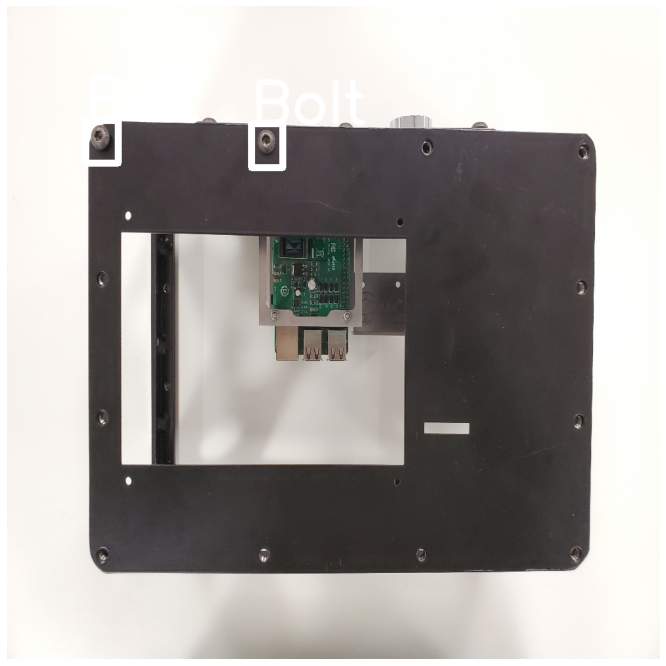

In [13]:
bolt_module.train_dataset().show_data(60)

In [14]:
loader = bolt_module.train_dataloader()

65


In [15]:
len(loader)

32

In [16]:
images, targets, bolts = next(iter(loader))

In [17]:
targets

[{'bboxes': tensor([[ 54.2883, 226.6982, 111.7755, 301.9203]], dtype=torch.float64),
  'labels': tensor([1]),
  'img_size': [1024, 1024],
  'img_scale': tensor([1.])},
 {'bboxes': tensor([[359.1111, 819.8095, 408.6349, 887.1958],
          [ 85.3333, 586.4974, 136.1270, 654.2222],
          [361.6508, 115.1323, 411.1746, 180.8254],
          [634.1587, 118.5185, 683.6825, 185.9048],
          [899.0476, 356.5714, 948.5714, 425.9894]], dtype=torch.float64),
  'labels': tensor([1, 1, 1, 1, 1]),
  'img_size': [1024, 1024],
  'img_scale': tensor([1.])}]